In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [2]:
#!pip install sklearn

In [3]:
df=pd.read_csv('airQuality.csv',parse_dates = ["Date"])
df

,Date,City,PM2.5,PM10,SO2,NO2,CO,NO,O3,NH3,AQI,AQI_Bucket
0,2023-02-23 06:41:00,Dhaka,79.44,97.78,3.10,8.74,447.27,0.0,52.93,3.71,5,NaN
1,2023-02-23 06:41:00,Faridpur,91.44,110.78,7.51,9.00,540.73,0.0,49.35,4.37,5,NaN
2,2023-02-23 06:41:00,Gazipur,77.78,95.25,2.44,6.34,423.91,0.0,51.50,4.18,5,NaN
3,2023-02-23 06:41:00,Gopalganj,147.56,164.69,15.97,10.45,727.65,0.0,95.84,27.87,5,NaN
4,2023-02-23 06:41:00,Jamalpur,212.20,235.52,17.88,16.28,1054.76,0.0,73.67,23.31,5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
6204,2023-05-14 19:52:00,Kushtia,27.16,36.02,2.47,10.88,654.22,0.0,31.11,21.53,3,NaN
6205,2023-05-14 19:52:00,Magura,20.30,25.69,2.03,7.63,567.44,0.0,50.78,16.72,2,NaN
6206,2023-05-14 19:52:00,Meherpur,21.21,28.46,2.09,8.05,594.14,0.0,45.42,21.79,2,NaN
6207,2023-05-14 19:52:00,Narail,16.24,19.98,1.64,5.40,520.71,0.0,57.94,13.05,2,NaN


<AxesSubplot:>

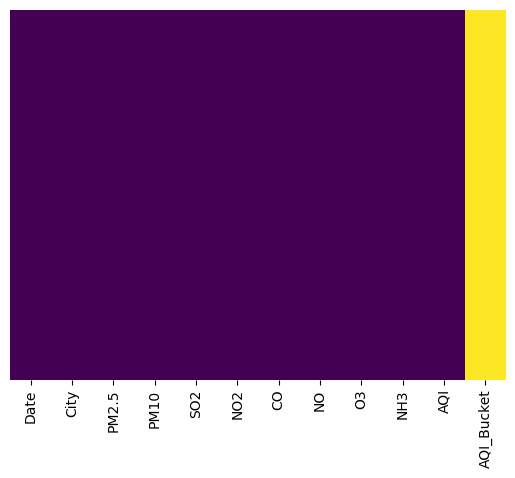

In [4]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [5]:
print(df.isnull().sum())

Date             0
City             0
PM2.5            0
PM10             0
SO2              0
NO2              0
CO               0
NO               0
O3               0
NH3              0
AQI              0
AQI_Bucket    6209
dtype: int64


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6209 entries, 0 to 6208
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        6209 non-null   datetime64[ns]
 1   City        6209 non-null   object        
 2   PM2.5       6209 non-null   float64       
 3   PM10        6209 non-null   float64       
 4   SO2         6209 non-null   float64       
 5   NO2         6209 non-null   float64       
 6   CO          6209 non-null   float64       
 7   NO          6209 non-null   float64       
 8   O3          6209 non-null   float64       
 9   NH3         6209 non-null   float64       
 10  AQI         6209 non-null   int64         
 11  AQI_Bucket  0 non-null      float64       
dtypes: datetime64[ns](1), float64(9), int64(1), object(1)
memory usage: 582.2+ KB


In [7]:
(df.isnull().sum()/df.shape[0]*100).sort_values(ascending=False)

AQI_Bucket    100.0
Date            0.0
City            0.0
PM2.5           0.0
PM10            0.0
SO2             0.0
NO2             0.0
CO              0.0
NO              0.0
O3              0.0
NH3             0.0
AQI             0.0
dtype: float64

In [8]:
df.describe()

,PM2.5,PM10,SO2,NO2,CO,NO,O3,NH3,AQI,AQI_Bucket
count,6209.000000,6209.000000,6209.000000,6209.000000,6209.000000,6209.000000,6209.000000,6209.000000,6209.00000,0.0
mean,86.308657,101.599535,5.994820,9.284247,755.449404,0.711828,82.109757,14.408726,4.09454,NaN
std,56.419543,65.374778,6.479383,10.503181,416.168298,4.607528,58.533259,16.639882,1.22839,NaN
min,0.720000,1.080000,0.020000,0.160000,247.000000,0.000000,0.000000,0.000000,1.00000,NaN
25%,45.040000,52.700000,1.770000,2.790000,507.360000,0.000000,33.980000,4.370000,3.00000,NaN
50%,82.190000,97.220000,3.610000,6.340000,667.570000,0.070000,71.530000,8.870000,5.00000,NaN
75%,117.110000,138.000000,7.870000,12.170000,894.550000,0.280000,118.730000,19.000000,5.00000,NaN
max,629.840000,677.990000,65.800000,153.540000,8331.300000,141.260000,366.210000,188.470000,5.00000,NaN


In [9]:
#converting dtype of date column to datetime
df['Date']=df['Date'].apply(pd.to_datetime)
#setting date column as index
df.set_index('Date',inplace=True)

In [10]:
df.columns

Index(['City', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'NO', 'O3', 'NH3', 'AQI',
       'AQI_Bucket'],
      dtype='object')

In [11]:
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
df[numeric_cols] = df.groupby("City")[numeric_cols].transform(lambda x: x.fillna(x.mean()))
df

,City,PM2.5,PM10,SO2,NO2,CO,NO,O3,NH3,AQI,AQI_Bucket
Date,,,,,,,,,,,
2023-02-23 06:41:00,Dhaka,79.44,97.78,3.10,8.74,447.27,0.0,52.93,3.71,5,NaN
2023-02-23 06:41:00,Faridpur,91.44,110.78,7.51,9.00,540.73,0.0,49.35,4.37,5,NaN
2023-02-23 06:41:00,Gazipur,77.78,95.25,2.44,6.34,423.91,0.0,51.50,4.18,5,NaN
2023-02-23 06:41:00,Gopalganj,147.56,164.69,15.97,10.45,727.65,0.0,95.84,27.87,5,NaN
2023-02-23 06:41:00,Jamalpur,212.20,235.52,17.88,16.28,1054.76,0.0,73.67,23.31,5,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2023-05-14 19:52:00,Kushtia,27.16,36.02,2.47,10.88,654.22,0.0,31.11,21.53,3,NaN
2023-05-14 19:52:00,Magura,20.30,25.69,2.03,7.63,567.44,0.0,50.78,16.72,2,NaN
2023-05-14 19:52:00,Meherpur,21.21,28.46,2.09,8.05,594.14,0.0,45.42,21.79,2,NaN


<AxesSubplot:ylabel='Date'>

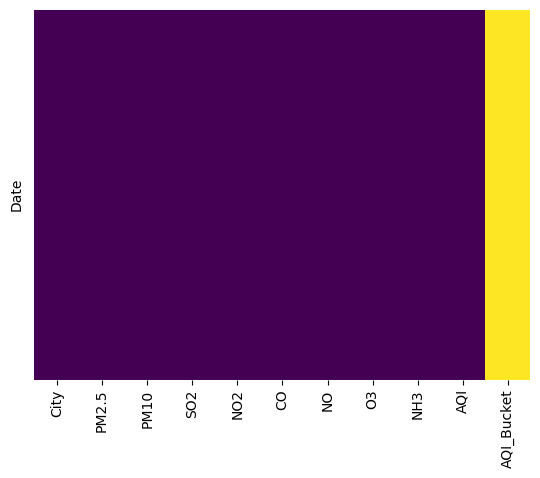

In [12]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [13]:
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())
df

,City,PM2.5,PM10,SO2,NO2,CO,NO,O3,NH3,AQI,AQI_Bucket
Date,,,,,,,,,,,
2023-02-23 06:41:00,Dhaka,79.44,97.78,3.10,8.74,447.27,0.0,52.93,3.71,5,NaN
2023-02-23 06:41:00,Faridpur,91.44,110.78,7.51,9.00,540.73,0.0,49.35,4.37,5,NaN
2023-02-23 06:41:00,Gazipur,77.78,95.25,2.44,6.34,423.91,0.0,51.50,4.18,5,NaN
2023-02-23 06:41:00,Gopalganj,147.56,164.69,15.97,10.45,727.65,0.0,95.84,27.87,5,NaN
2023-02-23 06:41:00,Jamalpur,212.20,235.52,17.88,16.28,1054.76,0.0,73.67,23.31,5,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2023-05-14 19:52:00,Kushtia,27.16,36.02,2.47,10.88,654.22,0.0,31.11,21.53,3,NaN
2023-05-14 19:52:00,Magura,20.30,25.69,2.03,7.63,567.44,0.0,50.78,16.72,2,NaN
2023-05-14 19:52:00,Meherpur,21.21,28.46,2.09,8.05,594.14,0.0,45.42,21.79,2,NaN


<AxesSubplot:ylabel='Date'>

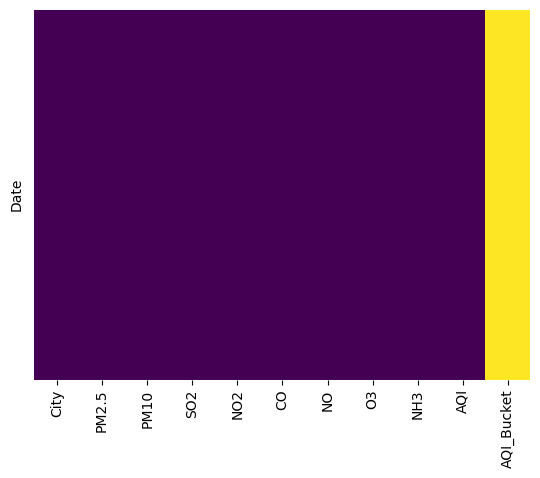

In [14]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [15]:
# PM10 Sub-Index calculation
def get_PM10_subindex(x):
    if x <= 50:
        return x
    elif x > 50 and x <= 100:
        return x
    elif x > 100 and x <= 250:
        return 100 + (x - 100) * 100 / 150
    elif x > 250 and x <= 350:
        return 200 + (x - 250)
    elif x > 350 and x <= 430:
        return 300 + (x - 350) * 100 / 80
    elif x > 430:
        return 400 + (x - 430) * 100 / 80
    else:
        return 0
df["PM10_SubIndex"] = pd.to_numeric(df["PM10"], errors='coerce').apply(lambda x: get_PM10_subindex(x))
# df["PM10_SubIndex"] = df["PM10"].astype(int).apply(lambda x: get_PM10_subindex(x))
    
# PM2.5 Sub-Index calculation
def get_PM25_subindex(x):
    if x <= 30:
        return x * 50 / 30
    elif x > 30 and x <= 60:
        return 50 + (x - 30) * 50 / 30
    elif x > 60 and x <= 90:
        return 100 + (x - 60) * 100 / 30
    elif x > 90 and x <= 120:
        return 200 + (x - 90) * 100 / 30
    elif x > 120 and x <= 250:
        return 300 + (x - 120) * 100 / 130
    elif x > 250:
        return 400 + (x - 250) * 100 / 130
    else:
        return 0
df["PM2.5_SubIndex"] = pd.to_numeric(df["PM2.5"], errors='coerce').apply(lambda x: get_PM25_subindex(x))
# df["PM2.5_SubIndex"] = df["PM2.5"].astype(int).apply(lambda x: get_PM25_subindex(x))


# SO2 Sub-Index calculation
def get_SO2_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x > 40 and x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x > 80 and x <= 380:
        return 100 + (x - 80) * 100 / 300
    elif x > 380 and x <= 800:
        return 200 + (x - 380) * 100 / 420
    elif x > 800 and x <= 1600:
        return 300 + (x - 800) * 100 / 800
    elif x > 1600:
        return 400 + (x - 1600) * 100 / 800
    else:
        return 0

df["SO2_SubIndex"] = pd.to_numeric(df["SO2"], errors='coerce').apply(lambda x: get_SO2_subindex(x))

# NOx Sub-Index calculation
def get_NO_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x > 40 and x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x > 80 and x <= 180:
        return 100 + (x - 80) * 100 / 100
    elif x > 180 and x <= 280:
        return 200 + (x - 180) * 100 / 100
    elif x > 280 and x <= 400:
        return 300 + (x - 280) * 100 / 120
    elif x > 400:
        return 400 + (x - 400) * 100 / 120
    else:
        return 0

df["NO_SubIndex"] = pd.to_numeric(df["NO"], errors='coerce').apply(lambda x: get_NO_subindex(x))

# NH3 Sub-Index calculation
def get_NH3_subindex(x):
    if x <= 200:
        return x * 50 / 200
    elif x > 200 and x <= 400:
        return 50 + (x - 200) * 50 / 200
    elif x > 400 and x <= 800:
        return 100 + (x - 400) * 100 / 400
    elif x > 800 and x <= 1200:
        return 200 + (x - 800) * 100 / 400
    elif x > 1200 and x <= 1800:
        return 300 + (x - 1200) * 100 / 600
    elif x > 1800:
        return 400 + (x - 1800) * 100 / 600
    else:
        return 0

df["NH3_SubIndex"] = pd.to_numeric(df["NH3"], errors='coerce').apply(lambda x: get_NH3_subindex(x))

# CO Sub-Index calculation
def get_CO_subindex(x):
    if x <= 1:
        return x * 50 / 1
    elif x > 1 and x <= 2:
        return 50 + (x - 1) * 50 / 1
    elif x > 2 and x <= 10:
        return 100 + (x - 2) * 100 / 8
    elif x > 10 and x <= 17:
        return 200 + (x - 10) * 100 / 7
    elif x > 17 and x <= 34:
        return 300 + (x - 17) * 100 / 17
    elif x > 34:
        return 400 + (x - 34) * 100 / 17
    else:
        return 0

df["CO_SubIndex"] = pd.to_numeric(df["CO"], errors='coerce').apply(lambda x: get_CO_subindex(x))

# O3 Sub-Index calculation
def get_O3_subindex(x):
    if x <= 50:
        return x * 50 / 50
    elif x > 50 and x <= 100:
        return 50 + (x - 50) * 50 / 50
    elif x > 100 and x <= 168:
        return 100 + (x - 100) * 100 / 68
    elif x > 168 and x <= 208:
        return 200 + (x - 168) * 100 / 40
    elif x > 208 and x <= 748:
        return 300 + (x - 208) * 100 / 539
    elif x > 748:
        return 400 + (x - 400) * 100 / 539
    else:
        return 0

df["O3_SubIndex"] = pd.to_numeric(df["O3"], errors='coerce').apply(lambda x: get_O3_subindex(x))

# AQI calculation
df["AQI"] = df[["PM2.5_SubIndex", "PM10_SubIndex"]].max(axis=1)

# Print the first 5 rows of the DataFrame
print(df.head())

                          City   PM2.5    PM10    SO2    NO2       CO   NO  \
Date                                                                         
2023-02-23 06:41:00      Dhaka   79.44   97.78   3.10   8.74   447.27  0.0   
2023-02-23 06:41:00   Faridpur   91.44  110.78   7.51   9.00   540.73  0.0   
2023-02-23 06:41:00    Gazipur   77.78   95.25   2.44   6.34   423.91  0.0   
2023-02-23 06:41:00  Gopalganj  147.56  164.69  15.97  10.45   727.65  0.0   
2023-02-23 06:41:00   Jamalpur  212.20  235.52  17.88  16.28  1054.76  0.0   

                        O3    NH3         AQI  AQI_Bucket  PM10_SubIndex  \
Date                                                                       
2023-02-23 06:41:00  52.93   3.71  164.800000         NaN      97.780000   
2023-02-23 06:41:00  49.35   4.37  204.800000         NaN     107.186667   
2023-02-23 06:41:00  51.50   4.18  159.266667         NaN      95.250000   
2023-02-23 06:41:00  95.84  27.87  321.200000         NaN     143.126667 

In [16]:
df["AQI"] = df["AQI"].fillna(round(df[["PM2.5_SubIndex", "PM10_SubIndex", "SO2_SubIndex", "NO_SubIndex","NH3_SubIndex", "CO_SubIndex", "O3_SubIndex"]].max(axis = 1)))


In [17]:
df

,City,PM2.5,PM10,SO2,NO2,CO,NO,O3,NH3,AQI,AQI_Bucket,PM10_SubIndex,PM2.5_SubIndex,SO2_SubIndex,NO_SubIndex,NH3_SubIndex,CO_SubIndex,O3_SubIndex
Date,,,,,,,,,,,,,,,,,,
2023-02-23 06:41:00,Dhaka,79.44,97.78,3.10,8.74,447.27,0.0,52.93,3.71,164.800000,NaN,97.780000,164.800000,3.8750,0.0,0.9275,2831.000000,52.93
2023-02-23 06:41:00,Faridpur,91.44,110.78,7.51,9.00,540.73,0.0,49.35,4.37,204.800000,NaN,107.186667,204.800000,9.3875,0.0,1.0925,3380.764706,49.35
2023-02-23 06:41:00,Gazipur,77.78,95.25,2.44,6.34,423.91,0.0,51.50,4.18,159.266667,NaN,95.250000,159.266667,3.0500,0.0,1.0450,2693.588235,51.50
2023-02-23 06:41:00,Gopalganj,147.56,164.69,15.97,10.45,727.65,0.0,95.84,27.87,321.200000,NaN,143.126667,321.200000,19.9625,0.0,6.9675,4480.294118,95.84
2023-02-23 06:41:00,Jamalpur,212.20,235.52,17.88,16.28,1054.76,0.0,73.67,23.31,370.923077,NaN,190.346667,370.923077,22.3500,0.0,5.8275,6404.470588,73.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-14 19:52:00,Kushtia,27.16,36.02,2.47,10.88,654.22,0.0,31.11,21.53,45.266667,NaN,36.020000,45.266667,3.0875,0.0,5.3825,4048.352941,31.11
2023-05-14 19:52:00,Magura,20.30,25.69,2.03,7.63,567.44,0.0,50.78,16.72,33.833333,NaN,25.690000,33.833333,2.5375,0.0,4.1800,3537.882353,50.78
2023-05-14 19:52:00,Meherpur,21.21,28.46,2.09,8.05,594.14,0.0,45.42,21.79,35.350000,NaN,28.460000,35.350000,2.6125,0.0,5.4475,3694.941176,45.42


<AxesSubplot:ylabel='Date'>

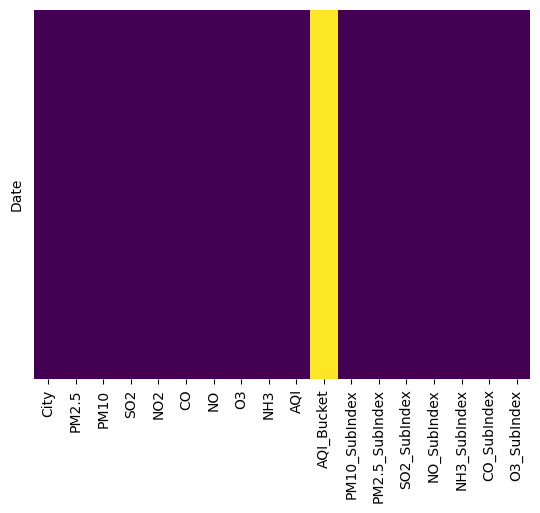

In [18]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

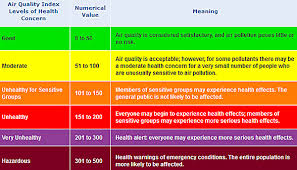

In [19]:
from IPython import display 
display.Image("images.jpg",width = 400, height = 200)

In [20]:
## AQI bucketing
def get_AQI_bucket(x):
    if x <= 50:
        return "Good"
    elif x > 50 and x <= 100:
        return "Satisfactory"
    elif x > 100 and x <= 200:
        return "Moderate"
    elif x > 200 and x <= 300:
        return "Poor"
    elif x > 300 and x <= 400:
        return "Very Poor"
    elif x > 400:
        return "Severe"
    
    else:
        return '0'
    
df["AQI_Bucket"] = df["AQI_Bucket"].fillna(df["AQI"].apply(lambda x: get_AQI_bucket(x)))

In [21]:
df

,City,PM2.5,PM10,SO2,NO2,CO,NO,O3,NH3,AQI,AQI_Bucket,PM10_SubIndex,PM2.5_SubIndex,SO2_SubIndex,NO_SubIndex,NH3_SubIndex,CO_SubIndex,O3_SubIndex
Date,,,,,,,,,,,,,,,,,,
2023-02-23 06:41:00,Dhaka,79.44,97.78,3.10,8.74,447.27,0.0,52.93,3.71,164.800000,Moderate,97.780000,164.800000,3.8750,0.0,0.9275,2831.000000,52.93
2023-02-23 06:41:00,Faridpur,91.44,110.78,7.51,9.00,540.73,0.0,49.35,4.37,204.800000,Poor,107.186667,204.800000,9.3875,0.0,1.0925,3380.764706,49.35
2023-02-23 06:41:00,Gazipur,77.78,95.25,2.44,6.34,423.91,0.0,51.50,4.18,159.266667,Moderate,95.250000,159.266667,3.0500,0.0,1.0450,2693.588235,51.50
2023-02-23 06:41:00,Gopalganj,147.56,164.69,15.97,10.45,727.65,0.0,95.84,27.87,321.200000,Very Poor,143.126667,321.200000,19.9625,0.0,6.9675,4480.294118,95.84
2023-02-23 06:41:00,Jamalpur,212.20,235.52,17.88,16.28,1054.76,0.0,73.67,23.31,370.923077,Very Poor,190.346667,370.923077,22.3500,0.0,5.8275,6404.470588,73.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-14 19:52:00,Kushtia,27.16,36.02,2.47,10.88,654.22,0.0,31.11,21.53,45.266667,Good,36.020000,45.266667,3.0875,0.0,5.3825,4048.352941,31.11
2023-05-14 19:52:00,Magura,20.30,25.69,2.03,7.63,567.44,0.0,50.78,16.72,33.833333,Good,25.690000,33.833333,2.5375,0.0,4.1800,3537.882353,50.78
2023-05-14 19:52:00,Meherpur,21.21,28.46,2.09,8.05,594.14,0.0,45.42,21.79,35.350000,Good,28.460000,35.350000,2.6125,0.0,5.4475,3694.941176,45.42


In [ ]:
df.to_csv("moderate.csv",index=False)

<AxesSubplot:ylabel='Date'>

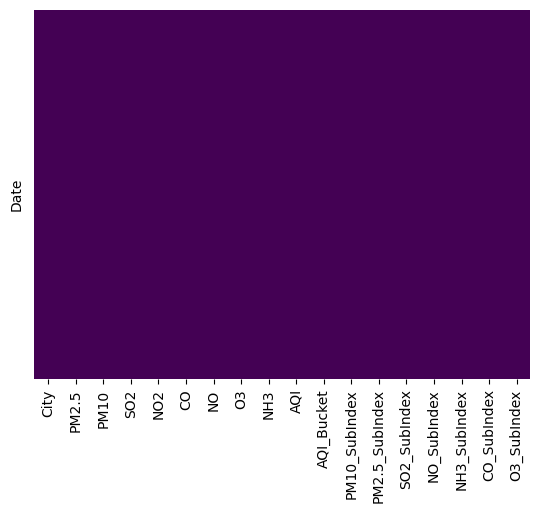

In [24]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [25]:
df.columns

Index(['City', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'NO', 'O3', 'NH3', 'AQI',
       'AQI_Bucket', 'PM10_SubIndex', 'PM2.5_SubIndex', 'SO2_SubIndex',
       'NO_SubIndex', 'NH3_SubIndex', 'CO_SubIndex', 'O3_SubIndex'],
      dtype='object')

In [26]:
df_city_day = df.copy()
df_city_day.columns

Index(['City', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'NO', 'O3', 'NH3', 'AQI',
       'AQI_Bucket', 'PM10_SubIndex', 'PM2.5_SubIndex', 'SO2_SubIndex',
       'NO_SubIndex', 'NH3_SubIndex', 'CO_SubIndex', 'O3_SubIndex'],
      dtype='object')

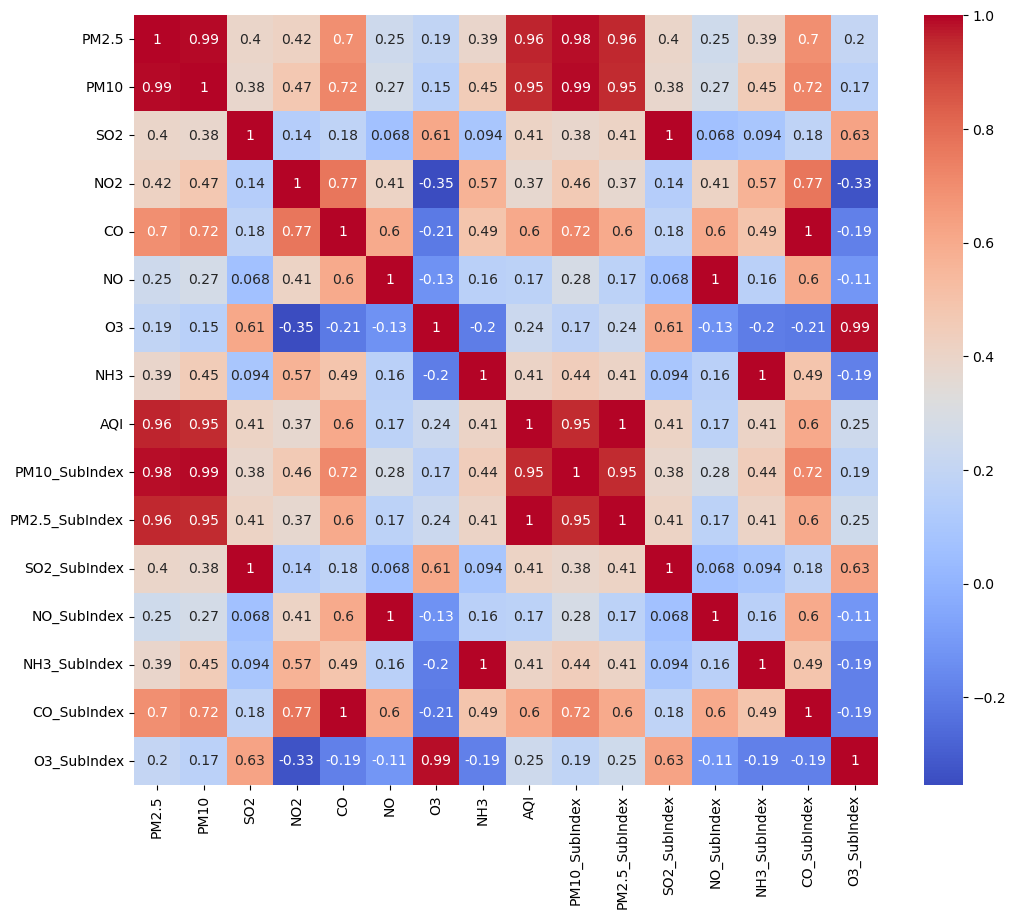

In [27]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True);

Distribution of different pollutants in last 3 months


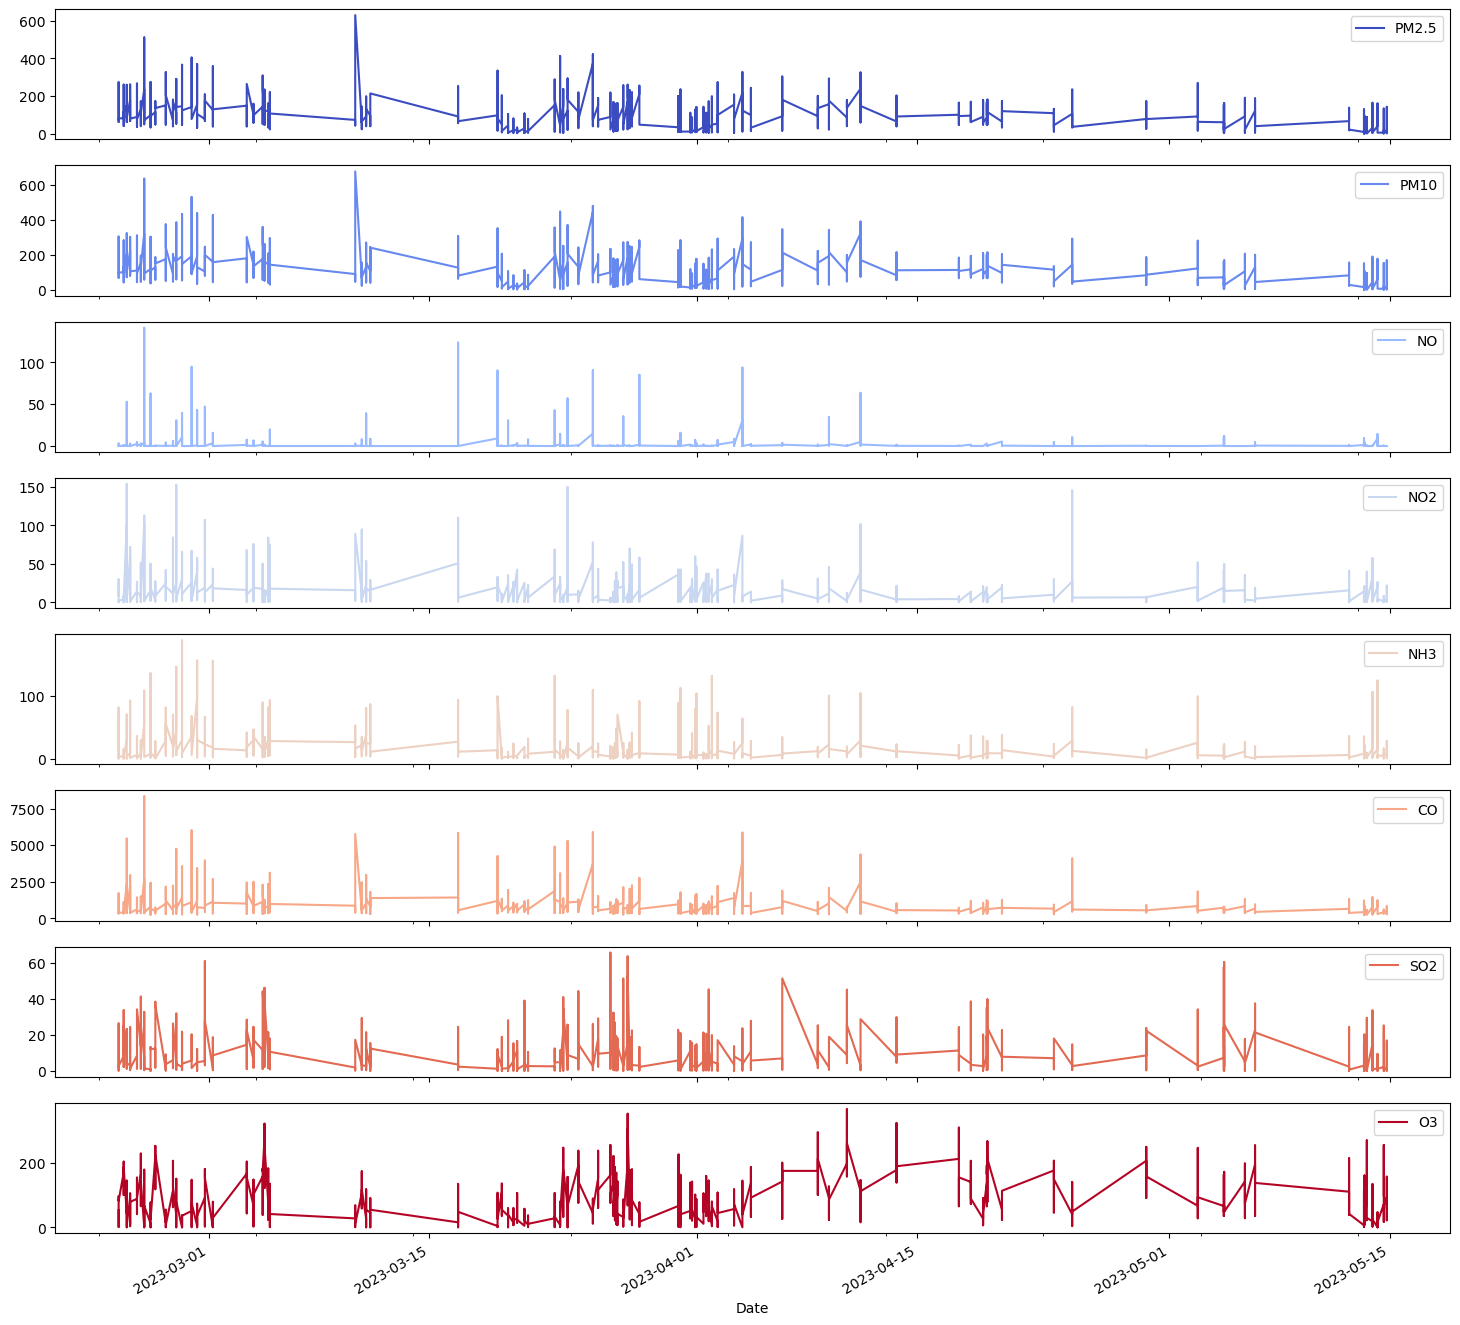

In [28]:
pollutants = ['PM2.5', 'PM10', 'NO', 'NO2', 'NH3', 'CO', 'SO2','O3']
df_city_day = df_city_day[pollutants]

print('Distribution of different pollutants in last 3 months')
df_city_day.plot(kind='line',figsize=(18,18),cmap='coolwarm',subplots=True,fontsize=10);

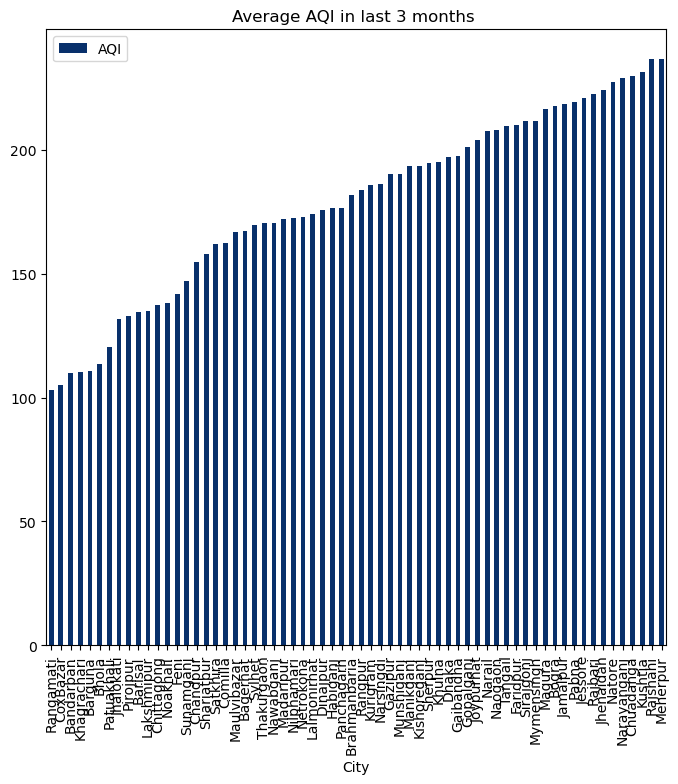

In [29]:
df[['City','AQI']].groupby('City').mean().sort_values('AQI').plot(kind='bar',cmap='Blues_r',figsize=(8,8))
plt.title('Average AQI in last 3 months ');

In [30]:
#Creating Model for predicting the Output
final_df= df[['AQI', 'AQI_Bucket']].copy()
final_df

,AQI,AQI_Bucket
Date,,
2023-02-23 06:41:00,164.800000,Moderate
2023-02-23 06:41:00,204.800000,Poor
2023-02-23 06:41:00,159.266667,Moderate
2023-02-23 06:41:00,321.200000,Very Poor
2023-02-23 06:41:00,370.923077,Very Poor
...,...,...
2023-05-14 19:52:00,45.266667,Good
2023-05-14 19:52:00,33.833333,Good
2023-05-14 19:52:00,35.350000,Good


In [44]:
final_df['AQI_Bucket'].unique()

array([3, 4, 5, 6, 2, 1])

In [45]:

final_df['AQI_Bucket'] = final_df['AQI_Bucket'].map({'Good' :1, 'Satisfactory' :2, 'Moderate' :3, 'Poor' :4, 'Very Poor' :5,'Severe':6}).astype(int) #mapping numbers
final_df.head()

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [33]:

X = final_df[['AQI']]
y = final_df[['AQI_Bucket']]

In [34]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=0)

clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 1.0


In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
d_accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
d_f1 = f1_score(y_test, y_pred, average='weighted')
c = confusion_matrix(y_test, y_pred)
print("Accuracy:", d_accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", d_f1)
print(c)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
[[317   0   0   0   0   0]
 [  0 284   0   0   0   0]
 [  0   0 420   0   0   0]
 [  0   0   0 377   0   0]
 [  0   0   0   0 444   0]
 [  0   0   0   0   0  21]]


In [36]:

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


y = y.values.ravel()

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=0)
clf = SVC(kernel='rbf', random_state=0)
clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.9817498658078369


In [38]:
s_accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
s_f1 = f1_score(y_test, y_pred, average='weighted')
c = confusion_matrix(y_test, y_pred)
print("Accuracy:", s_accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", s_f1)
print(c)

Accuracy: 0.9817498658078369
Precision: 0.982274258658583
Recall: 0.9817498658078369
F1 Score: 0.9816632296683814
[[317   0   0   0   0   0]
 [  3 281   0   0   0   0]
 [  0  10 408   2   0   0]
 [  0   0   0 362  15   0]
 [  0   0   0   0 444   0]
 [  0   0   0   0   4  17]]


In [39]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.9817498658078369
              precision    recall  f1-score   support

           1       0.99      1.00      1.00       317
           2       0.97      0.99      0.98       284
           3       1.00      0.97      0.99       420
           4       0.99      0.96      0.98       377
           5       0.96      1.00      0.98       444
           6       1.00      0.81      0.89        21

    accuracy                           0.98      1863
   macro avg       0.98      0.96      0.97      1863
weighted avg       0.98      0.98      0.98      1863

[[317   0   0   0   0   0]
 [  3 281   0   0   0   0]
 [  0  10 408   2   0   0]
 [  0   0   0 362  15   0]
 [  0   0   0   0 444   0]
 [  0   0   0   0   4  17]]


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc


X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=0)


clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)


matrix = confusion_matrix(y_test, y_pred, labels=[1, 0])
TP, FN, FP, TN = matrix.reshape(-1)
print('Values of TP, FN, FP, TN:', TP, FN, FP, TN)


acc_func = accuracy_score(y_test, y_pred)
print('Accuracy from function:', acc_func)
acc_form = (TP + TN) / (TP + FN + FP + TN)
print('Accuracy from formula:', acc_form)


prec_func = precision_score(y_test, y_pred, average='weighted')

print('Precision from function:', prec_func)
prec_form = TP / (TP + FP)
print('Precision from formula:', prec_form)


rec_func = recall_score(y_test, y_pred, average='weighted')

print('Recall from function:', rec_func)
rec_form = TP / (TP + FN)
print('Recall from formula:', rec_form)


f1_func = f1_score(y_test, y_pred,average='weighted')
print('F1-score from function: ', f1_func)
f1_form = (2 * prec_form * rec_form) / (prec_form + rec_form)
print('F1-score from formula: ', f1_form)


Values of TP, FN, FP, TN: 317 0 0 0
Accuracy from function: 1.0
Accuracy from formula: 1.0
Precision from function: 1.0
Precision from formula: 1.0
Recall from function: 1.0
Recall from formula: 1.0
F1-score from function:  1.0
F1-score from formula:  1.0


In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset into a Pandas DataFrame
data = df

# Preprocess the data by separating the input features (X) and the target variable (y)
X = data.drop("AQI_Bucket", axis=1)  # Input features
y = data["AQI_Bucket"]  # Target variable

# Encode the categorical feature "City" using one-hot encoding
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
#model = LogisticRegression()
model = LogisticRegression(max_iter=1000, solver='liblinear')
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

classification_report = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_report)

Accuracy: 0.5161030595813204
Classification Report:
               precision    recall  f1-score   support

        Good       0.63      0.68      0.65       220
    Moderate       0.44      0.46      0.45       281
        Poor       0.48      0.43      0.45       270
Satisfactory       0.42      0.36      0.39       178
      Severe       0.00      0.00      0.00        12
   Very Poor       0.57      0.65      0.61       281

    accuracy                           0.52      1242
   macro avg       0.42      0.43      0.43      1242
weighted avg       0.51      0.52      0.51      1242



G:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
G:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
G:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the dataset into a Pandas DataFrame
data = df  # Replace 'df' with your actual DataFrame

# Preprocess the data by separating the input features (X) and the target variable (y)
X = data.drop("AQI_Bucket", axis=1)  # Input features
y = data["AQI_Bucket"]  # Target variable

# Perform one-hot encoding for categorical feature "City"
X = pd.get_dummies(X)

# Convert data type to float
X = X.astype(float)

# Encode the target variable using label encoding
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Build the ANN model
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=len(encoder.classes_), activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# Make predictions on the test set
y_pred_prob = model.predict(X_test)
y_pred_labels = encoder.inverse_transform(y_pred_prob.argmax(axis=1))

# Convert the true labels back to their original values
y_test_labels = encoder.inverse_transform(y_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test_labels, y_pred_labels)
print("Accuracy:", accuracy)

classification_report = classification_report(y_test_labels, y_pred_labels)
print("Classification Report:\n", classification_report)


In [41]:
# Print the F1-score and accuracy of each model
print("SVM - F1-score:", s_f1, "Accuracy:", s_accuracy)
print("Decision Tree - F1-score:", d_f1, "Accuracy:", d_accuracy)
print("Random Forest - F1-score:", f1_func, "Accuracy:", acc_func)

SVM - F1-score: 0.9831130262512988 Accuracy: 0.983243566726511
Decision Tree - F1-score: 0.9988088091484767 Accuracy: 0.9988031119090365
Random Forest - F1-score: 0.9988088091484767 Accuracy: 0.9988031119090365


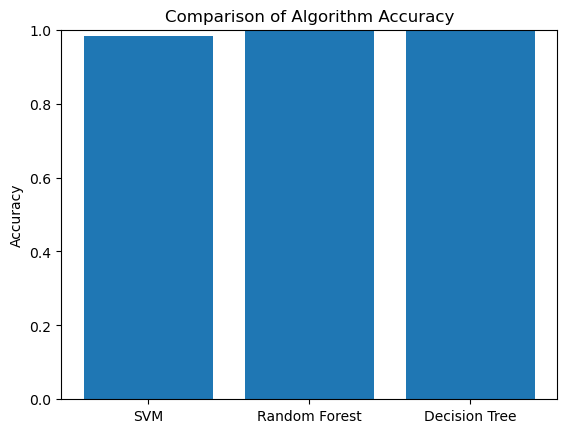

In [42]:
import matplotlib.pyplot as plt
plt.bar(['SVM', 'Random Forest', 'Decision Tree'], [s_accuracy, acc_func, d_accuracy])
plt.ylim([0, 1])
plt.ylabel('Accuracy')
plt.title('Comparison of Algorithm Accuracy')
plt.show()
